In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,NaN,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,NaN,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,NaN,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,NaN,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,NaN,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,NaN,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	30
float64		column 3	31
float64		column 4	49
float64		column 5	18
float64		column 6	12
float64		column 7	67
float64		column 8	43
float64		column 9	31
float64		column 10	55
float64		column 11	36
float64		column 12	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,370.000000,370.000000,369.000000,351.000000,382.000000,388.000000,333.000000,357.000000,369.000000,345.000000,364.000000,364.000000
mean,-0.089232,-0.023227,2.033257,1.922979,1.925060,1.959793,2.059544,1.981621,1.962969,2.025169,1.945910,1.988727
std,2.500194,2.703362,1.127848,1.129471,1.149671,1.139858,1.119154,1.112188,1.130937,1.130574,1.131845,1.183404
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.067105,0.006786,0.001972
25%,-0.652245,-0.822895,1.122900,0.983925,0.882807,1.028333,1.140900,1.109900,1.070000,1.045500,0.943813,0.952565
50%,-0.068013,0.002626,2.089000,1.836300,1.906950,2.005400,2.120400,1.975400,2.042100,2.077700,1.886600,1.954950
75%,0.718243,0.844503,2.954900,2.797950,2.925825,2.946650,2.953000,2.926100,2.903300,3.024700,2.912750,3.008225
max,8.409300,6.777100,3.976400,3.992700,3.979000,3.992300,3.932800,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

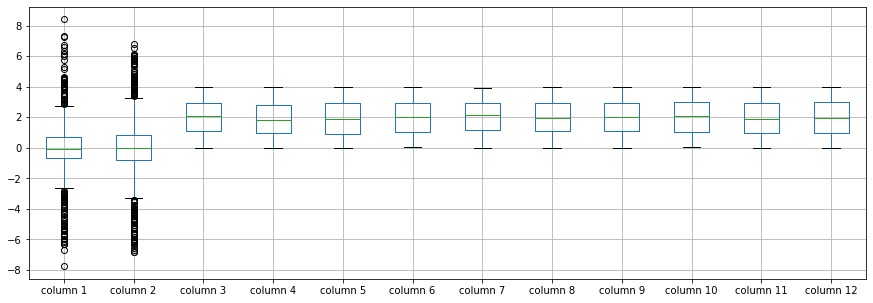

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.089232
column 2    -0.023227
column 3     2.033257
column 4     1.922979
column 5     1.925060
column 6     1.959793
column 7     2.059544
column 8     1.981621
column 9     1.962969
column 10    2.025169
column 11    1.945910
column 12    1.988727
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.047452,-0.050119,-0.105093,0.002489,0.002812,-0.001656,0.024197,-0.003040,0.016694,0.060145,-0.042373
column 2,0.047452,1.000000,-0.077388,0.025352,-0.056846,-0.079225,0.012103,-0.027882,-0.032007,0.005307,-0.040272,0.042497
column 3,-0.050119,-0.077388,1.000000,0.016462,-0.012834,-0.055040,-0.021408,0.069238,0.123331,-0.042865,-0.114070,-0.042038
column 4,-0.105093,0.025352,0.016462,1.000000,-0.029267,0.096429,0.006448,0.086665,-0.025515,0.083582,-0.041861,-0.001198
column 5,0.002489,-0.056846,-0.012834,-0.029267,1.000000,0.060492,0.026031,0.026129,0.038253,0.055464,0.005386,-0.056917
column 6,0.002812,-0.079225,-0.055040,0.096429,0.060492,1.000000,0.018845,0.079132,0.003200,-0.015703,-0.007712,-0.030353
column 7,-0.001656,0.012103,-0.021408,0.006448,0.026031,0.018845,1.000000,0.027047,0.096407,0.030440,0.027619,-0.095355
column 8,0.024197,-0.027882,0.069238,0.086665,0.026129,0.079132,0.027047,1.000000,0.045252,-0.138831,-0.060455,-0.001421
column 9,-0.003040,-0.032007,0.123331,-0.025515,0.038253,0.003200,0.096407,0.045252,1.000000,0.056985,0.032832,0.022749
column 10,0.016694,0.005307,-0.042865,0.083582,0.055464,-0.015703,0.030440,-0.138831,0.056985,1.000000,0.021917,0.031889


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+65,12+65+65,12+65+65+65,12+65+65+65+65,12+65+65+65+65+65,12+65+65+65+65+65+65,12+65+65+65+65+65+65+65,12+65+65+65+65+65+65,12+65+65+65+65+65,12+65+65+65+65,12+65+65+65,12+65+65,12+65,12], vae_layer = False, seed = 65)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.181929473876952
Epoch: 1 , loss: 25.02668327331543
Epoch: 2 , loss: 24.301577911376953
Epoch: 3 , loss: 21.55874641418457
Epoch: 4 , loss: 21.362057189941407
Epoch: 5 , loss: 21.010261917114256
Epoch: 6 , loss: 20.799085388183595
Epoch: 7 , loss: 20.75186958312988
Epoch: 8 , loss: 20.49477653503418
Epoch: 9 , loss: 20.206203231811525
Epoch: 10 , loss: 19.797618560791015
Epoch: 11 , loss: 19.755576934814453
Epoch: 12 , loss: 19.661745452880858
Epoch: 13 , loss: 19.403081512451173
Epoch: 14 , loss: 19.419868774414063
Epoch: 15 , loss: 18.92338119506836
Epoch: 16 , loss: 18.935337524414063
Epoch: 17 , loss: 18.458055953979493
Epoch: 18 , loss: 18.879641189575196
Epoch: 19 , loss: 18.400389556884765
Epoch: 20 , loss: 18.346480407714843
Epoch: 21 , loss: 17.962940292358397
Epoch: 22 , loss: 18.049337921142577
Epoch: 23 , loss: 18.21861099243164
Epoch: 24 , loss: 17.950508499145506
Epoch: 25 , loss: 17.46

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     2.767319
column 8     2.227200
column 9     2.577198
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.251521,0.0,0.000000,0.00000,0.0
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,-3.257389,0.000000,0.0,0.000000,0.00000,0.0
3,0.000000,0.0,0.000000,1.609744,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
4,0.000000,0.0,-2.132279,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
396,-0.342208,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
397,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0
398,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.32768,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(39.58031301759157, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.24241580787766923

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     2.201345
column 5     2.236400
column 6     2.583000
column 7     2.830600
column 8     2.320065
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.88660,2.46960,0.215410,3.090000,0.78343,0.510350,0.03043,0.100660
1,0.029389,0.206580,0.488610,1.434300,3.12990,1.27780,1.428500,1.394851,1.19480,2.131800,0.98473,3.844500
2,-1.115400,0.217560,1.610500,1.337100,3.76820,1.21000,0.738911,2.217300,3.90290,1.514400,2.43890,0.633580
3,-0.539160,-0.061874,0.364860,1.942524,0.19027,0.56716,1.660100,2.352700,0.66126,3.135100,3.93810,3.734600
4,-0.268400,-1.006000,0.749921,1.561600,3.20140,3.37740,1.522600,0.984750,3.10940,3.656400,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,0.88269,0.35406,1.627800,3.294000,1.08500,0.157400,0.46504,2.851400
396,-0.077578,-6.107600,3.905400,1.337700,1.41870,1.68610,1.095100,3.793600,0.12790,0.542490,3.36580,3.755600
397,-3.479100,-1.993300,1.324800,1.772100,2.55090,1.47010,0.925400,1.841100,3.47730,0.954960,1.52630,2.123800
398,7.293000,-0.411470,2.494800,0.396550,2.99900,3.41010,2.951600,0.278000,0.99059,3.437400,1.48852,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NG_10(imp).xlsx", index=False, header=False)